In [171]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import plotly
import seaborn as sns
import plotly
import plotly.express as px
import plotly.graph_objs as go
from plotly.offline import init_notebook_mode, plot, iplot
from plotly import tools

In [172]:
ball_data=pd.read_csv('IPL_Ball_by_Ball_2008_2022.csv')
match_data=pd.read_csv('IPL_Matches_2008_2022.csv')

In [173]:
ball_data.head()

,ID,innings,overs,ballnumber,batter,bowler,non-striker,extra_type,batsman_run,extras_run,total_run,non_boundary,isWicketDelivery,player_out,kind,fielders_involved,BattingTeam
0,1312200,1,0,1,YBK Jaiswal,Mohammed Shami,JC Buttler,NaN,0,0,0,0,0,NaN,NaN,NaN,Rajasthan Royals
1,1312200,1,0,2,YBK Jaiswal,Mohammed Shami,JC Buttler,legbyes,0,1,1,0,0,NaN,NaN,NaN,Rajasthan Royals
2,1312200,1,0,3,JC Buttler,Mohammed Shami,YBK Jaiswal,NaN,1,0,1,0,0,NaN,NaN,NaN,Rajasthan Royals
3,1312200,1,0,4,YBK Jaiswal,Mohammed Shami,JC Buttler,NaN,0,0,0,0,0,NaN,NaN,NaN,Rajasthan Royals
4,1312200,1,0,5,YBK Jaiswal,Mohammed Shami,JC Buttler,NaN,0,0,0,0,0,NaN,NaN,NaN,Rajasthan Royals


In [174]:
match_data.head()

,ID,City,Date,Season,MatchNumber,Team1,Team2,Venue,TossWinner,TossDecision,SuperOver,WinningTeam,WonBy,Margin,method,Player_of_Match,Team1Players,Team2Players,Umpire1,Umpire2
0,1312200,Ahmedabad,2022-05-29,2022,Final,Rajasthan Royals,Gujarat Titans,"Narendra Modi Stadium, Ahmedabad",Rajasthan Royals,bat,N,Gujarat Titans,Wickets,7.0,NaN,HH Pandya,"['YBK Jaiswal', 'JC Buttler', 'SV Samson', 'D ...","['WP Saha', 'Shubman Gill', 'MS Wade', 'HH Pan...",CB Gaffaney,Nitin Menon
1,1312199,Ahmedabad,2022-05-27,2022,Qualifier 2,Royal Challengers Bangalore,Rajasthan Royals,"Narendra Modi Stadium, Ahmedabad",Rajasthan Royals,field,N,Rajasthan Royals,Wickets,7.0,NaN,JC Buttler,"['V Kohli', 'F du Plessis', 'RM Patidar', 'GJ ...","['YBK Jaiswal', 'JC Buttler', 'SV Samson', 'D ...",CB Gaffaney,Nitin Menon
2,1312198,Kolkata,2022-05-25,2022,Eliminator,Royal Challengers Bangalore,Lucknow Super Giants,"Eden Gardens, Kolkata",Lucknow Super Giants,field,N,Royal Challengers Bangalore,Runs,14.0,NaN,RM Patidar,"['V Kohli', 'F du Plessis', 'RM Patidar', 'GJ ...","['Q de Kock', 'KL Rahul', 'M Vohra', 'DJ Hooda...",J Madanagopal,MA Gough
3,1312197,Kolkata,2022-05-24,2022,Qualifier 1,Rajasthan Royals,Gujarat Titans,"Eden Gardens, Kolkata",Gujarat Titans,field,N,Gujarat Titans,Wickets,7.0,NaN,DA Miller,"['YBK Jaiswal', 'JC Buttler', 'SV Samson', 'D ...","['WP Saha', 'Shubman Gill', 'MS Wade', 'HH Pan...",BNJ Oxenford,VK Sharma
4,1304116,Mumbai,2022-05-22,2022,70,Sunrisers Hyderabad,Punjab Kings,"Wankhede Stadium, Mumbai",Sunrisers Hyderabad,bat,N,Punjab Kings,Wickets,5.0,NaN,Harpreet Brar,"['PK Garg', 'Abhishek Sharma', 'RA Tripathi', ...","['JM Bairstow', 'S Dhawan', 'M Shahrukh Khan',...",AK Chaudhary,NA Patwardhan


In [175]:
ball_data.isnull().sum()

ID                        0
innings                   0
overs                     0
ballnumber                0
batter                    0
bowler                    0
non-striker               0
extra_type           213905
batsman_run               0
extras_run                0
total_run                 0
non_boundary              0
isWicketDelivery          0
player_out           214803
kind                 214803
fielders_involved    217966
BattingTeam               0
dtype: int64

In [176]:
match_data.isnull().sum()

ID                   0
City                51
Date                 0
Season               0
MatchNumber          0
Team1                0
Team2                0
Venue                0
TossWinner           0
TossDecision         0
SuperOver            4
WinningTeam          4
WonBy                0
Margin              18
method             931
Player_of_Match      4
Team1Players         0
Team2Players         0
Umpire1              0
Umpire2              0
dtype: int64

In [177]:
match_data.shape

(950, 20)

In [178]:
match_data.columns

Index(['ID', 'City', 'Date', 'Season', 'MatchNumber', 'Team1', 'Team2',
       'Venue', 'TossWinner', 'TossDecision', 'SuperOver', 'WinningTeam',
       'WonBy', 'Margin', 'method', 'Player_of_Match', 'Team1Players',
       'Team2Players', 'Umpire1', 'Umpire2'],
      dtype='object')

In [179]:
print('Total Matches Played:',match_data.shape[0])
print("---------------------------------------------------------------------------")
print("Teams are : ",match_data["Team1"].unique())
print("---------------------------------------------------------------------------")
print("Stadiums are :",match_data["Venue"].unique())
print("---------------------------------------------------------------------------")

Total Matches Played: 950
---------------------------------------------------------------------------
Teams are :  ['Rajasthan Royals' 'Royal Challengers Bangalore' 'Sunrisers Hyderabad'
 'Delhi Capitals' 'Chennai Super Kings' 'Gujarat Titans'
 'Lucknow Super Giants' 'Kolkata Knight Riders' 'Punjab Kings'
 'Mumbai Indians' 'Kings XI Punjab' 'Delhi Daredevils'
 'Rising Pune Supergiant' 'Gujarat Lions' 'Rising Pune Supergiants'
 'Pune Warriors' 'Deccan Chargers' 'Kochi Tuskers Kerala']
---------------------------------------------------------------------------
Stadiums are : ['Narendra Modi Stadium, Ahmedabad' 'Eden Gardens, Kolkata'
 'Wankhede Stadium, Mumbai' 'Brabourne Stadium, Mumbai'
 'Dr DY Patil Sports Academy, Mumbai'
 'Maharashtra Cricket Association Stadium, Pune'
 'Dubai International Cricket Stadium' 'Sharjah Cricket Stadium'
 'Zayed Cricket Stadium, Abu Dhabi' 'Arun Jaitley Stadium, Delhi'
 'MA Chidambaram Stadium, Chepauk, Chennai' 'Sheikh Zayed Stadium'
 'Rajiv Gandhi Inte

In [180]:
match_data.value_counts('Team1')

Team1
Royal Challengers Bangalore    126
Mumbai Indians                 112
Chennai Super Kings            111
Kolkata Knight Riders          105
Kings XI Punjab                 92
Rajasthan Royals                89
Delhi Daredevils                85
Sunrisers Hyderabad             69
Deccan Chargers                 39
Delhi Capitals                  29
Pune Warriors                   23
Punjab Kings                    18
Gujarat Lions                   16
Lucknow Super Giants             8
Kochi Tuskers Kerala             7
Gujarat Titans                   7
Rising Pune Supergiant           7
Rising Pune Supergiants          7
dtype: int64

# Number of matches played in various season

In [181]:
match_data['season']=pd.DatetimeIndex(match_data['Date']).year    #DatetimeIndex is useful for date and time format
match_data

,ID,City,Date,Season,MatchNumber,Team1,Team2,Venue,TossWinner,TossDecision,...,WinningTeam,WonBy,Margin,method,Player_of_Match,Team1Players,Team2Players,Umpire1,Umpire2,season
0,1312200,Ahmedabad,2022-05-29,2022,Final,Rajasthan Royals,Gujarat Titans,"Narendra Modi Stadium, Ahmedabad",Rajasthan Royals,bat,...,Gujarat Titans,Wickets,7.0,NaN,HH Pandya,"['YBK Jaiswal', 'JC Buttler', 'SV Samson', 'D ...","['WP Saha', 'Shubman Gill', 'MS Wade', 'HH Pan...",CB Gaffaney,Nitin Menon,2022
1,1312199,Ahmedabad,2022-05-27,2022,Qualifier 2,Royal Challengers Bangalore,Rajasthan Royals,"Narendra Modi Stadium, Ahmedabad",Rajasthan Royals,field,...,Rajasthan Royals,Wickets,7.0,NaN,JC Buttler,"['V Kohli', 'F du Plessis', 'RM Patidar', 'GJ ...","['YBK Jaiswal', 'JC Buttler', 'SV Samson', 'D ...",CB Gaffaney,Nitin Menon,2022
2,1312198,Kolkata,2022-05-25,2022,Eliminator,Royal Challengers Bangalore,Lucknow Super Giants,"Eden Gardens, Kolkata",Lucknow Super Giants,field,...,Royal Challengers Bangalore,Runs,14.0,NaN,RM Patidar,"['V Kohli', 'F du Plessis', 'RM Patidar', 'GJ ...","['Q de Kock', 'KL Rahul', 'M Vohra', 'DJ Hooda...",J Madanagopal,MA Gough,2022
3,1312197,Kolkata,2022-05-24,2022,Qualifier 1,Rajasthan Royals,Gujarat Titans,"Eden Gardens, Kolkata",Gujarat Titans,field,...,Gujarat Titans,Wickets,7.0,NaN,DA Miller,"['YBK Jaiswal', 'JC Buttler', 'SV Samson', 'D ...","['WP Saha', 'Shubman Gill', 'MS Wade', 'HH Pan...",BNJ Oxenford,VK Sharma,2022
4,1304116,Mumbai,2022-05-22,2022,70,Sunrisers Hyderabad,Punjab Kings,"Wankhede Stadium, Mumbai",Sunrisers Hyderabad,bat,...,Punjab Kings,Wickets,5.0,NaN,Harpreet Brar,"['PK Garg', 'Abhishek Sharma', 'RA Tripathi', ...","['JM Bairstow', 'S Dhawan', 'M Shahrukh Khan',...",AK Chaudhary,NA Patwardhan,2022
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
945,335986,Kolkata,2008-04-20,2007/08,4,Kolkata Knight Riders,Deccan Chargers,Eden Gardens,Deccan Chargers,bat,...,Kolkata Knight Riders,Wickets,5.0,NaN,DJ Hussey,"['WP Saha', 'BB McCullum', 'RT Ponting', 'SC G...","['AC Gilchrist', 'Y Venugopal Rao', 'VVS Laxma...",BF Bowden,K Hariharan,2008
946,335985,Mumbai,2008-04-20,2007/08,5,Mumbai Indians,Royal Challengers Bangalore,Wankhede Stadium,Mumbai Indians,bat,...,Royal Challengers Bangalore,Wickets,5.0,NaN,MV Boucher,"['L Ronchi', 'ST Jayasuriya', 'DJ Thornely', '...","['S Chanderpaul', 'R Dravid', 'LRPL Taylor', '...",SJ Davis,DJ Harper,2008
947,335984,Delhi,2008-04-19,2007/08,3,Delhi Daredevils,Rajasthan Royals,Feroz Shah Kotla,Rajasthan Royals,bat,...,Delhi Daredevils,Wickets,9.0,NaN,MF Maharoof,"['G Gambhir', 'V Sehwag', 'S Dhawan', 'MK Tiwa...","['T Kohli', 'YK Pathan', 'SR Watson', 'M Kaif'...",Aleem Dar,GA Pratapkumar,2008
948,335983,Chandigarh,2008-04-19,2007/08,2,Kings XI Punjab,Chennai Super Kings,"Punjab Cricket Association Stadium, Mohali",Chennai Super Kings,bat,...,Chennai Super Kings,Runs,33.0,NaN,MEK Hussey,"['K Goel', 'JR Hopes', 'KC Sangakkara', 'Yuvra...","['PA Patel', 'ML Hayden', 'MEK Hussey', 'MS Dh...",MR Benson,SL Shastri,2008


In [182]:
match_per_year=match_data.groupby(['Season'])['ID'].count().reset_index().rename(columns={'ID':'matches'})
match_per_year.style.background_gradient(cmap='PuBu')

,Season,matches
0,2007/08,58
1,2009,57
2,2009/10,60
3,2011,73
4,2012,74
5,2013,76
6,2014,60
7,2015,59
8,2016,60
9,2017,59


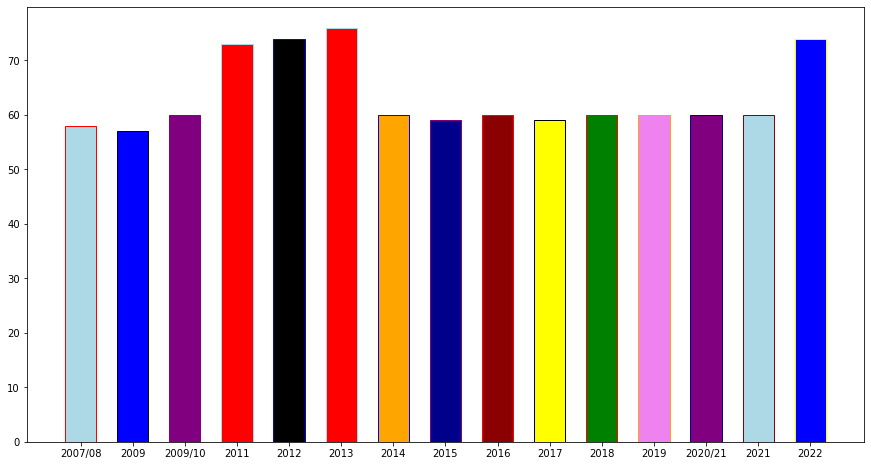

In [183]:
col=['lightblue', 'blue', 'purple', 'red', 'black','red', 'orange', 'darkblue', 'darkred', 'yellow','green','violet','purple','lightblue', 'blue']
edgecolor=['red','black','purple','lightblue', 'blue','lightblue', 'blue', 'purple', 'red', 'black','red', 'orange', 'darkblue', 'darkred', 'yellow']
fig=plt.figure(figsize=(15,8))
#plt.bar(match_per_year['Season'],match_per_year['matches'],width=0.6,color ='maroon')
plt.bar(match_per_year['Season'],match_per_year['matches'],width=0.6,color=col,edgecolor=edgecolor)
plt.show()


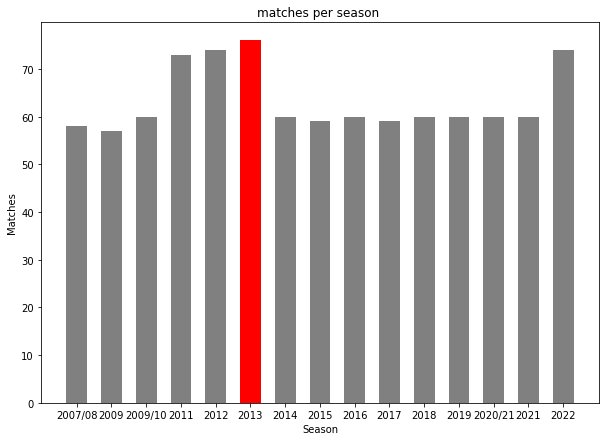

In [184]:
#color max value
max_value=max(match_per_year['matches'])
fig=plt.figure(figsize=(10,7))
col=['grey' if x < max_value else 'red' for x in match_per_year['matches']]
plt.bar(match_per_year['Season'],match_per_year['matches'],width=0.6,color=col)
plt.title("matches per season ")
plt.xlabel("Season")
plt.ylabel("Matches")
plt.show()

# Total number of runs scored across seasons 

In [185]:
season_data=match_data[['ID','season']].merge(ball_data,left_on='ID', right_on='ID').drop('ID',axis=1)
season_data.head()

,season,innings,overs,ballnumber,batter,bowler,non-striker,extra_type,batsman_run,extras_run,total_run,non_boundary,isWicketDelivery,player_out,kind,fielders_involved,BattingTeam
0,2022,1,0,1,YBK Jaiswal,Mohammed Shami,JC Buttler,NaN,0,0,0,0,0,NaN,NaN,NaN,Rajasthan Royals
1,2022,1,0,2,YBK Jaiswal,Mohammed Shami,JC Buttler,legbyes,0,1,1,0,0,NaN,NaN,NaN,Rajasthan Royals
2,2022,1,0,3,JC Buttler,Mohammed Shami,YBK Jaiswal,NaN,1,0,1,0,0,NaN,NaN,NaN,Rajasthan Royals
3,2022,1,0,4,YBK Jaiswal,Mohammed Shami,JC Buttler,NaN,0,0,0,0,0,NaN,NaN,NaN,Rajasthan Royals
4,2022,1,0,5,YBK Jaiswal,Mohammed Shami,JC Buttler,NaN,0,0,0,0,0,NaN,NaN,NaN,Rajasthan Royals


<AxesSubplot:xlabel='season', ylabel='total_run'>

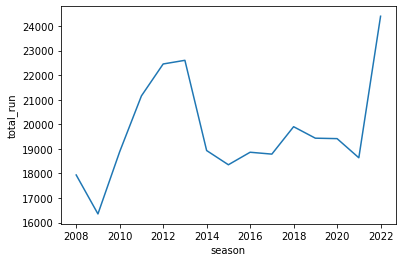

In [186]:
# Data preparation

#sns.lineplot(x=season_data["season"], y=season_data["total_run"])
#plt.show()
season=season_data.groupby(['season'])['total_run'].sum().reset_index()
p=season.set_index('season')
sns.lineplot(p, x=p.index, y="total_run")

In [187]:
season=season_data.groupby(['season'])['total_run'].sum().reset_index()
p=season.set_index('season')
fig = px.line(p, x=p.index, y="total_run")
fig.update_layout(title="Total Runs Across the Seasons ",
                  titlefont={'size': 26},template='simple_white'     
                  )
fig.show()

# Runs scored per match across seasons :

In [188]:
runs_per_season=pd.concat([match_per_year,season.iloc[:,1]],axis=1)
runs_per_season['Runs scored per match']=runs_per_season['total_run']/runs_per_season['matches']
runs_per_season.set_index('Season',inplace=True)   #ser_index is use for season as an index
runs_per_season.style.background_gradient(cmap='PuBu',subset=['Runs scored per match','total_run'])

,matches,total_run,Runs scored per match
Season,,,
2007/08,58,17937,309.258621
2009,57,16353,286.894737
2009/10,60,18883,314.716667
2011,73,21154,289.780822
2012,74,22453,303.418919
2013,76,22602,297.394737
2014,60,18931,315.516667
2015,59,18353,311.067797
2016,60,18862,314.366667


In [189]:
px.line(runs_per_season,x=runs_per_season.index,y=runs_per_season['Runs scored per match'],title='Runs scored per match',template='simple_white')

# Counts of matches by umpire

In [190]:
ump=pd.concat([match_data["Umpire1"],match_data['Umpire2']])
ump=ump.value_counts()
umpire=ump.to_frame().reset_index() #set index otherwise umpire is index
umpire=umpire.rename({'index':'umpire',0:'matches'},axis=1)
umpire.head(10)

,umpire,matches
0,S Ravi,131
1,AK Chaudhary,111
2,HDPK Dharmasena,94
3,C Shamshuddin,88
4,Nitin Menon,83
5,CB Gaffaney,69
6,M Erasmus,67
7,CK Nandan,59
8,BNJ Oxenford,57
9,KN Ananthapadmanabhan,56


# Number of tosses won by teams 

In [191]:
toss=match_data['TossWinner'].value_counts()


In [192]:
px.bar(y=toss,x=toss.index,labels=dict(x='season',y='number',template='simple_white'))

# Decision made after winning the toss 

([<matplotlib.patches.Wedge at 0x1b935e2a2e0>,
 [Text(-0.5700906545077123, 1.3114483007892337, 'field'),
  Text(0.5700906545077119, -1.311448300789234, 'bat')],
 [Text(-0.31095853882238855, 0.7153354367941275, '63.1%'),
  Text(0.3109585388223883, -0.7153354367941276, '36.9%')])

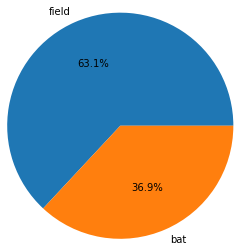

In [193]:
temp=match_data['TossDecision'].value_counts()
labels=np.array(temp.index)
#values=np.array(temp/temp.sum())*100
plt.pie(temp,labels=labels,autopct='%1.1f%%',radius=1.3)

# Toss decision across seasons

In [194]:
colors = ['blue', 'orange']
fig=px.histogram(data_frame=match_data,x='Season',color='TossDecision',color_discrete_sequence=colors,barmode='group')#barmode='group' is for group
fig.update_layout(title="Toss decision in different seasons",
                  titlefont={'size': 26},template='simple_white'     
                  )
# fig.update_traces(marker_line_color='black',
#                  marker_line_width=2.5, opacity=1)
fig.show()

# Winning toss implies winning game ?

In [195]:
match_data.head()
match_data["Toss&game win"]=np.where((match_data['TossWinner']==match_data['WinningTeam']),'Yes','No')

In [196]:
# tem=match_data['Toss&game win'].value_counts()
# labels=np.array(tem.index)
# plt.pie(temp,labels=labels,autopct='%1.1f%%',radius=1.3)

tem=match_data['Toss&game win'].value_counts()
labels=['Yes','No']
fig = go.Figure(data=[go.Pie(labels=labels,
                             values=tem,hole=.3)])

fig.show()

# Match result

In [197]:
match_data.WonBy.value_counts()

Wickets      509
Runs         423
SuperOver     14
NoResults      4
Name: WonBy, dtype: int64

# Number of times team have won the tournament

In [198]:
winning_teams = match_data[['season','WinningTeam']]

#dictionaries to get winners to each season
winners_team = {}
for i in sorted(winning_teams.season.unique()):
    winners_team[i] = winning_teams[winning_teams.season == i]['WinningTeam'].head(1).values[0]
    
winners_of_IPL = pd.Series(winners_team)
winners_of_IPL = pd.DataFrame(winners_of_IPL, columns=['team'])


In [199]:
winners_of_IPL.value_counts()

team                 
Mumbai Indians           5
Chennai Super Kings      4
Kolkata Knight Riders    2
Deccan Chargers          1
Gujarat Titans           1
Rajasthan Royals         1
Sunrisers Hyderabad      1
dtype: int64

In [200]:
winners_of_IPL

,team
2008,Rajasthan Royals
2009,Deccan Chargers
2010,Chennai Super Kings
2011,Chennai Super Kings
2012,Kolkata Knight Riders
2013,Mumbai Indians
2014,Kolkata Knight Riders
2015,Mumbai Indians
2016,Sunrisers Hyderabad
2017,Mumbai Indians


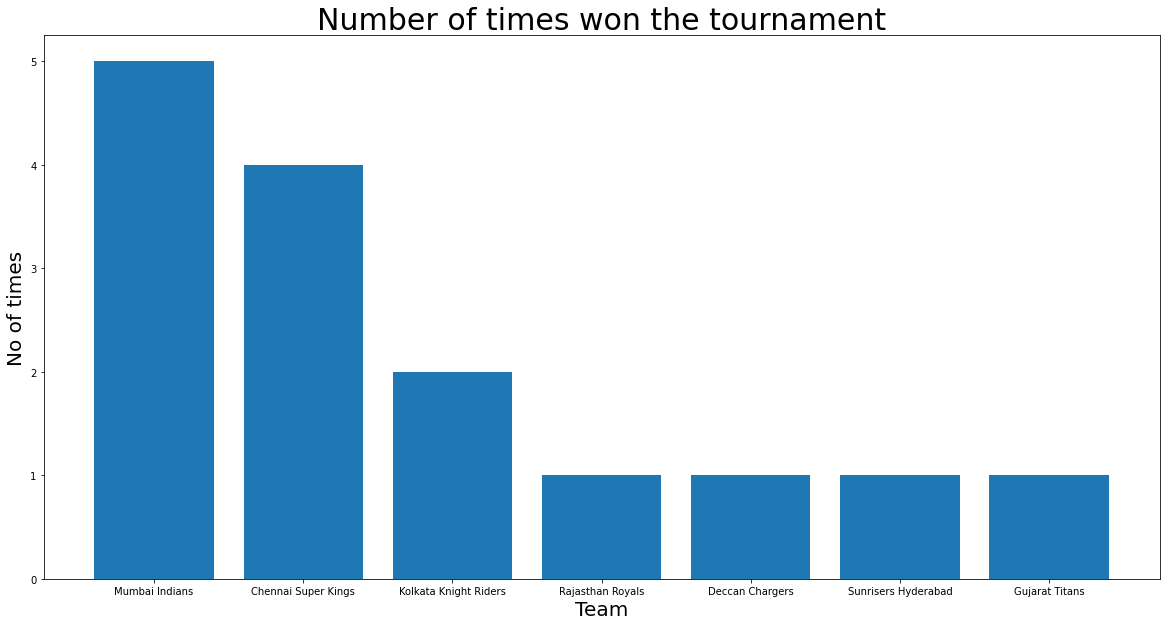

In [201]:
plt.figure(figsize=(20,10))
plt.bar(winners_of_IPL['team'].value_counts().index,winners_of_IPL['team'].value_counts())
plt.title('Number of times won the tournament',fontsize=30)
plt.xlabel("Team",fontsize=20)
plt.ylabel('No of times',fontsize=20)
plt.show()


In [202]:
#uisng plotly
fig=px.bar(y=winners_of_IPL['team'].value_counts(),x=winners_of_IPL['team'].value_counts().index,labels=dict(x="Team name",y="count"))
fig.update_layout(title="Number of times won the tournament ",titlefont={'size': 26},template='simple_white')
fig.show()


# Total no of matches by a team

In [203]:
matches_by_team=pd.concat([match_data['Team1'],match_data['Team2']],axis=1)
teams=(matches_by_team['Team1'].value_counts()+matches_by_team['Team2'].value_counts()).reset_index()
teams.columns=['Team',"total matches"]
teams

,Team,total matches
0,Chennai Super Kings,208
1,Deccan Chargers,75
2,Delhi Capitals,63
3,Delhi Daredevils,161
4,Gujarat Lions,30
5,Gujarat Titans,16
6,Kings XI Punjab,190
7,Kochi Tuskers Kerala,14
8,Kolkata Knight Riders,223
9,Lucknow Super Giants,15


In [204]:
wins=pd.DataFrame(match_data['WinningTeam'].value_counts()).reset_index()
wins.columns=['Team','Win']
wins.style.background_gradient(cmap='PuBu')

,Team,Win
0,Mumbai Indians,131
1,Chennai Super Kings,121
2,Kolkata Knight Riders,114
3,Royal Challengers Bangalore,109
4,Rajasthan Royals,96
5,Kings XI Punjab,88
6,Sunrisers Hyderabad,75
7,Delhi Daredevils,67
8,Delhi Capitals,36
9,Deccan Chargers,29


In [205]:
play=teams.merge(wins)
play['% win']=(play['Win']/play['total matches'])*100
play.sort_values(by=['% win'],ascending=False)

,Team,total matches,Win,% win
5,Gujarat Titans,16,12,75.000000
14,Rising Pune Supergiant,16,10,62.500000
9,Lucknow Super Giants,15,9,60.000000
0,Chennai Super Kings,208,121,58.173077
2,Delhi Capitals,63,36,57.142857
10,Mumbai Indians,231,131,56.709957
8,Kolkata Knight Riders,223,114,51.121076
13,Rajasthan Royals,192,96,50.000000
17,Sunrisers Hyderabad,152,75,49.342105
16,Royal Challengers Bangalore,226,109,48.230088


In [206]:
fig=px.bar(x=play['Team'],y=play['total matches'],labels=dict(x="Team",y="Total matches"))
fig.update_layout(title="Total matches of each team",template='simple_white')
fig.show()

# Most number of wins

In [207]:
fig=px.bar(x=play['Team'],y=play['Win'],labels=dict(x='Team name',y='no of wins'))
fig.update_layout(title='Most number of wins',template='simple_white')
fig.show()

# particular batsman analysis

In [208]:
ball_data.head()

,ID,innings,overs,ballnumber,batter,bowler,non-striker,extra_type,batsman_run,extras_run,total_run,non_boundary,isWicketDelivery,player_out,kind,fielders_involved,BattingTeam
0,1312200,1,0,1,YBK Jaiswal,Mohammed Shami,JC Buttler,NaN,0,0,0,0,0,NaN,NaN,NaN,Rajasthan Royals
1,1312200,1,0,2,YBK Jaiswal,Mohammed Shami,JC Buttler,legbyes,0,1,1,0,0,NaN,NaN,NaN,Rajasthan Royals
2,1312200,1,0,3,JC Buttler,Mohammed Shami,YBK Jaiswal,NaN,1,0,1,0,0,NaN,NaN,NaN,Rajasthan Royals
3,1312200,1,0,4,YBK Jaiswal,Mohammed Shami,JC Buttler,NaN,0,0,0,0,0,NaN,NaN,NaN,Rajasthan Royals
4,1312200,1,0,5,YBK Jaiswal,Mohammed Shami,JC Buttler,NaN,0,0,0,0,0,NaN,NaN,NaN,Rajasthan Royals


In [209]:
virat=ball_data['batter']=='V Kohli'
virat_data=ball_data[virat]
virat_data

,ID,innings,overs,ballnumber,batter,bowler,non-striker,extra_type,batsman_run,extras_run,total_run,non_boundary,isWicketDelivery,player_out,kind,fielders_involved,BattingTeam
233,1312199,1,0,1,V Kohli,TA Boult,F du Plessis,NaN,0,0,0,0,0,NaN,NaN,NaN,Royal Challengers Bangalore
234,1312199,1,0,2,V Kohli,TA Boult,F du Plessis,NaN,1,0,1,0,0,NaN,NaN,NaN,Royal Challengers Bangalore
236,1312199,1,0,4,V Kohli,TA Boult,F du Plessis,NaN,0,0,0,0,0,NaN,NaN,NaN,Royal Challengers Bangalore
237,1312199,1,0,5,V Kohli,TA Boult,F du Plessis,NaN,0,0,0,0,0,NaN,NaN,NaN,Royal Challengers Bangalore
238,1312199,1,0,6,V Kohli,TA Boult,F du Plessis,NaN,6,0,6,0,0,NaN,NaN,NaN,Royal Challengers Bangalore
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
225861,335982,2,1,2,V Kohli,I Sharma,W Jaffer,NaN,0,0,0,0,0,NaN,NaN,NaN,Royal Challengers Bangalore
225862,335982,2,1,3,V Kohli,I Sharma,W Jaffer,legbyes,0,4,4,0,0,NaN,NaN,NaN,Royal Challengers Bangalore
225863,335982,2,1,4,V Kohli,I Sharma,W Jaffer,NaN,1,0,1,0,0,NaN,NaN,NaN,Royal Challengers Bangalore
225866,335982,2,2,1,V Kohli,AB Dinda,W Jaffer,NaN,0,0,0,0,0,NaN,NaN,NaN,Royal Challengers Bangalore


In [210]:
virat_data['kind'].value_counts()

caught               120
bowled                36
run out               19
lbw                   11
stumped                4
caught and bowled      3
Name: kind, dtype: int64

In [211]:
values = virat_data['kind'].value_counts()
labels=virat_data['kind'].value_counts().index
fig = go.Figure(data=[go.Pie(labels=labels,values=values,hole=.3)])
fig.update_layout(title="Type of dismissal of Virat kohli",
                  titlefont={'size': 30},
                  )
fig.show()

In [212]:
rohit=ball_data['batter']=='RG Sharma'
rohit_data=ball_data[rohit]
rohit_data

,ID,innings,overs,ballnumber,batter,bowler,non-striker,extra_type,batsman_run,extras_run,total_run,non_boundary,isWicketDelivery,player_out,kind,fielders_involved,BattingTeam
1329,1304115,2,0,5,RG Sharma,KK Ahmed,Ishan Kishan,NaN,0,0,0,0,0,NaN,NaN,NaN,Mumbai Indians
1330,1304115,2,0,6,RG Sharma,KK Ahmed,Ishan Kishan,NaN,0,0,0,0,0,NaN,NaN,NaN,Mumbai Indians
1337,1304115,2,2,1,RG Sharma,KK Ahmed,Ishan Kishan,NaN,0,0,0,0,0,NaN,NaN,NaN,Mumbai Indians
1338,1304115,2,2,2,RG Sharma,KK Ahmed,Ishan Kishan,NaN,0,0,0,0,0,NaN,NaN,NaN,Mumbai Indians
1339,1304115,2,2,3,RG Sharma,KK Ahmed,Ishan Kishan,NaN,0,0,0,0,0,NaN,NaN,NaN,Mumbai Indians
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
224438,335988,1,17,6,RG Sharma,MF Maharoof,AS Yadav,NaN,2,0,2,0,0,NaN,NaN,NaN,Deccan Chargers
224442,335988,1,18,4,RG Sharma,R Bhatia,AS Yadav,NaN,0,0,0,0,1,RG Sharma,caught,GD McGrath,Deccan Chargers
224829,335986,1,8,2,RG Sharma,M Kartik,A Symonds,NaN,0,0,0,0,0,NaN,NaN,NaN,Deccan Chargers
224830,335986,1,8,3,RG Sharma,M Kartik,A Symonds,NaN,0,0,0,0,0,NaN,NaN,NaN,Deccan Chargers


In [213]:
rohit_data["kind"].value_counts()

caught               135
bowled                24
run out               20
lbw                   13
caught and bowled      8
stumped                3
Name: kind, dtype: int64

In [214]:
values=rohit_data['kind'].value_counts()
labels=rohit_data['kind'].value_counts().index
fig = go.Figure(data=[go.Pie(labels=labels,values=values,hole=.3)])
fig.update_layout(title="Rohit sharma's batting analysis",titlefont={'size':30})
fig.show()

# Innings wise comparison

In [215]:
ball_data.head()

,ID,innings,overs,ballnumber,batter,bowler,non-striker,extra_type,batsman_run,extras_run,total_run,non_boundary,isWicketDelivery,player_out,kind,fielders_involved,BattingTeam
0,1312200,1,0,1,YBK Jaiswal,Mohammed Shami,JC Buttler,NaN,0,0,0,0,0,NaN,NaN,NaN,Rajasthan Royals
1,1312200,1,0,2,YBK Jaiswal,Mohammed Shami,JC Buttler,legbyes,0,1,1,0,0,NaN,NaN,NaN,Rajasthan Royals
2,1312200,1,0,3,JC Buttler,Mohammed Shami,YBK Jaiswal,NaN,1,0,1,0,0,NaN,NaN,NaN,Rajasthan Royals
3,1312200,1,0,4,YBK Jaiswal,Mohammed Shami,JC Buttler,NaN,0,0,0,0,0,NaN,NaN,NaN,Rajasthan Royals
4,1312200,1,0,5,YBK Jaiswal,Mohammed Shami,JC Buttler,NaN,0,0,0,0,0,NaN,NaN,NaN,Rajasthan Royals


In [216]:
runs=ball_data.groupby(['ID','innings','BattingTeam'])[['total_run']].sum().reset_index()
runs.drop('ID',axis=1)

,innings,BattingTeam,total_run
0,1,Kolkata Knight Riders,222
1,2,Royal Challengers Bangalore,82
2,1,Chennai Super Kings,240
3,2,Kings XI Punjab,207
4,1,Rajasthan Royals,129
...,...,...,...
1923,2,Lucknow Super Giants,193
1924,1,Royal Challengers Bangalore,157
1925,2,Rajasthan Royals,161
1926,1,Rajasthan Royals,130


In [217]:
innings1=runs[runs['innings']==1]
innings2=runs[runs['innings']==2]

In [218]:
fig=px.box(y='total_run',x='BattingTeam',data_frame=innings1)
fig.update_layout(title='Batting first Analysis',titlefont={'size':20},template='simple_white')
fig.show()

In [219]:
fig=px.box(y='total_run',x='BattingTeam',data_frame=innings2)
fig.update_layout(title='Batting second analysis',titlefont={'size':20},template='simple_white')
fig.show()

# More than 200+ runs

In [220]:
ball_data.head()

,ID,innings,overs,ballnumber,batter,bowler,non-striker,extra_type,batsman_run,extras_run,total_run,non_boundary,isWicketDelivery,player_out,kind,fielders_involved,BattingTeam
0,1312200,1,0,1,YBK Jaiswal,Mohammed Shami,JC Buttler,NaN,0,0,0,0,0,NaN,NaN,NaN,Rajasthan Royals
1,1312200,1,0,2,YBK Jaiswal,Mohammed Shami,JC Buttler,legbyes,0,1,1,0,0,NaN,NaN,NaN,Rajasthan Royals
2,1312200,1,0,3,JC Buttler,Mohammed Shami,YBK Jaiswal,NaN,1,0,1,0,0,NaN,NaN,NaN,Rajasthan Royals
3,1312200,1,0,4,YBK Jaiswal,Mohammed Shami,JC Buttler,NaN,0,0,0,0,0,NaN,NaN,NaN,Rajasthan Royals
4,1312200,1,0,5,YBK Jaiswal,Mohammed Shami,JC Buttler,NaN,0,0,0,0,0,NaN,NaN,NaN,Rajasthan Royals


In [221]:
score=ball_data.groupby(['ID','innings','BattingTeam'])['total_run'].sum().reset_index()
more_200=score[score['total_run']>=200]
more_200.head()

,ID,innings,BattingTeam,total_run
0,335982,1,Kolkata Knight Riders,222
2,335983,1,Chennai Super Kings,240
3,335983,2,Kings XI Punjab,207
14,335989,1,Chennai Super Kings,208
15,335989,2,Mumbai Indians,202


In [222]:
more_200['total_run'].value_counts

<bound method IndexOpsMixin.value_counts of 0       222
2       240
3       207
14      208
15      202
       ... 
1888    208
1898    209
1910    210
1911    208
1922    207
Name: total_run, Length: 133, dtype: int64>

In [223]:
fig=px.bar(x=more_200['BattingTeam'],y=more_200['total_run'],labels=dict(x='Batting team',y='no of time more than 200 runs'))
fig.update_layout(title='More than 200 runs in one innings',template='simple_white')
fig.show()

# Top 10 run scorer 

In [224]:
runs=ball_data.groupby(['batter'])['batsman_run'].sum().reset_index()
run=runs.sort_values(by='batsman_run',ascending=False)
top=run.head(10)
top

,batter,batsman_run
569,V Kohli,6634
462,S Dhawan,6244
130,DA Warner,5883
430,RG Sharma,5881
493,SK Raina,5536
27,AB de Villiers,5181
108,CH Gayle,4997
339,MS Dhoni,4978
452,RV Uthappa,4954
256,KD Karthik,4377


In [225]:
fig=px.bar(x=top['batter'],y=top['batsman_run'],labels=dict(x='Batter name',y='Batsman run'))
fig.update_layout(title='Top 10 highest scorer',titlefont={'size':20},template='simple_white')
fig.show()

# Top 10 wicket taker

In [226]:
bowl=ball_data.groupby(['bowler'])['isWicketDelivery'].sum().reset_index()
bow=bowl.sort_values(by='isWicketDelivery',ascending=False)
bow

,bowler,isWicketDelivery
109,DJ Bravo,207
393,SL Malinga,188
7,A Mishra,175
317,R Ashwin,174
468,YS Chahal,172
...,...,...
301,P Ray Barman,0
300,P Prasanth,0
296,P Dubey,0
51,Akash Singh,0


In [227]:
fig=px.bar(x=bow['bowler'].head(10),y=bow["isWicketDelivery"].head(10),labels=dict(x='Bowler name',y='No of wickets taken'))
fig.update_layout(title='Top 10 wicket taker',titlefont={'size':20},template='simple_white')
fig.show()

# Highest No of sixes

In [233]:
sixer=ball_data[ball_data['batsman_run']==6]
run_six=sixer.groupby('batter')['batsman_run'].count().reset_index()
run_six.columns=['Batsman name','6s']
six=run_six.sort_values(by='6s',ascending=False).head(10)
six

,Batsman name,6s
71,CH Gayle,359
13,AB de Villiers,253
289,RG Sharma,241
227,MS Dhoni,229
163,KA Pollard,224
380,V Kohli,219
85,DA Warner,216
327,SK Raina,204
343,SR Watson,190
306,RV Uthappa,182


In [238]:
fig=px.bar(x=six['Batsman name'],y=six['6s'],labels=dict(x='Batsman name',y='Hit 6s'))
fig.update_layout(title='No of 6s hit by batsman',title_font={'size':20},template='simple_white')
fig.show()

# most Man of the match award

In [251]:
man_of_the_match=match_data['Player_of_Match'].value_counts().reset_index().head(10)
man_of_the_match

,index,Player_of_Match
0,AB de Villiers,25
1,CH Gayle,22
2,DA Warner,18
3,RG Sharma,18
4,MS Dhoni,17
5,YK Pathan,16
6,SR Watson,16
7,KA Pollard,14
8,SK Raina,14
9,V Kohli,14


In [256]:
fig=px.bar(x=man_of_the_match['index'],y=man_of_the_match['Player_of_Match'],labels=dict(x='Man of the match player Name',y='No of man of the match'))
fig.update_layout(title='Top 10 man of the match',title_font={'size':20},template='simple_white')
fig.show()